<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(1_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.104016,73.548086,92.945325,1.762847,260.360274,252.763269,7.597005
1,0.0,1.0,83.118363,35.475907,33.857412,-10.568065,151.883617,161.965477,-10.081860
2,0.0,2.0,33.712638,93.705424,55.613788,-10.722643,182.309208,190.557753,-8.248545
3,0.0,3.0,53.200670,87.252086,42.162041,-11.715283,180.899514,189.473757,-8.574243
4,0.0,4.0,42.706185,71.618722,73.419907,-11.492983,186.251830,196.095329,-9.843499
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,36.845199,94.892406,38.341774,-0.152580,179.926800,179.518048,0.408752
59996,999.0,56.0,57.059002,39.229541,20.270239,-2.153716,124.405066,124.374573,0.030494
59997,999.0,57.0,47.457648,64.052255,63.466863,-15.418689,169.558077,181.652546,-12.094469
59998,999.0,58.0,60.389822,22.138547,50.416442,1.124921,144.069731,138.087285,5.982447


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.104016,73.548086,92.945325,1.762847,260.360274,252.763269,7.597005
1,0.0,1.0,83.118363,35.475907,33.857412,-10.568065,151.883617,161.965477,-10.081860
2,0.0,2.0,33.712638,93.705424,55.613788,-10.722643,182.309208,190.557753,-8.248545
3,0.0,3.0,53.200670,87.252086,42.162041,-11.715283,180.899514,189.473757,-8.574243
4,0.0,4.0,42.706185,71.618722,73.419907,-11.492983,186.251830,196.095329,-9.843499
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,36.845199,94.892406,38.341774,-0.152580,179.926800,179.518048,0.408752
59996,999.0,56.0,57.059002,39.229541,20.270239,-2.153716,124.405066,124.374573,0.030494
59997,999.0,57.0,47.457648,64.052255,63.466863,-15.418689,169.558077,181.652546,-12.094469
59998,999.0,58.0,60.389822,22.138547,50.416442,1.124921,144.069731,138.087285,5.982447


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    82.104016  73.548086  92.945325  ...  260.360274  252.763269   7.597005
      1.0    83.118363  35.475907  33.857412  ...  151.883617  161.965477 -10.081860
      2.0    33.712638  93.705424  55.613788  ...  182.309208  190.557753  -8.248545
      3.0    53.200670  87.252086  42.162041  ...  180.899514  189.473757  -8.574243
      4.0    42.706185  71.618722  73.419907  ...  186.251830  196.095329  -9.843499
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   36.845199  94.892406  38.341774  ...  179.926800  179.518048   0.408752
      56.0   57.059002  39.229541  20.270239  ...  124.405066  124.374573   0.030494
      57.0   47.457648  64.052255  63.466863  ...  169.558077  181.652546 -12.094469
      58.0   60.389822  22.138547  50.416442  ...  144.069731  138.087285   5.982447
      59.0   33.993998  94.878781  52.655892  ...  206.408550  189.884019  16.524531

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    82.104016  73.548086  92.945325  ...  260.360274  252.763269   7.597005
      1.0    83.118363  35.475907  33.857412  ...  151.883617  161.965477 -10.081860
      2.0    33.712638  93.705424  55.613788  ...  182.309208  190.557753  -8.248545
      3.0    53.200670  87.252086  42.162041  ...  180.899514  189.473757  -8.574243
      4.0    42.706185  71.618722  73.419907  ...  186.251830  196.095329  -9.843499
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   36.845199  94.892406  38.341774  ...  179.926800  179.518048   0.408752
      56.0   57.059002  39.229541  20.270239  ...  124.405066  124.374573   0.030494
      57.0   47.457648  64.052255  63.466863  ...  169.558077  181.652546 -12.094469
      58.0   60.389822  22.138547  50.416442  ...  144.069731  138.087285   5.982447
      59.0   33.993998  94.878781  52.655892  ...  206.408550  189.884019  16.524531

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.104016,73.548086,92.945325,1.762847,260.360274,252.763269,7.597005
1,0.0,1.0,83.118363,35.475907,33.857412,-10.568065,151.883617,161.965477,-10.081860
2,0.0,2.0,33.712638,93.705424,55.613788,-10.722643,182.309208,190.557753,-8.248545
3,0.0,3.0,53.200670,87.252086,42.162041,-11.715283,180.899514,189.473757,-8.574243
4,0.0,4.0,42.706185,71.618722,73.419907,-11.492983,186.251830,196.095329,-9.843499
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,36.845199,94.892406,38.341774,-0.152580,179.926800,179.518048,0.408752
59996,999.0,56.0,57.059002,39.229541,20.270239,-2.153716,124.405066,124.374573,0.030494
59997,999.0,57.0,47.457648,64.052255,63.466863,-15.418689,169.558077,181.652546,-12.094469
59998,999.0,58.0,60.389822,22.138547,50.416442,1.124921,144.069731,138.087285,5.982447


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    82.104016  73.548086  92.945325  ...  260.360274  252.763269   7.597005
      1.0    83.118363  35.475907  33.857412  ...  151.883617  161.965477 -10.081860
      2.0    33.712638  93.705424  55.613788  ...  182.309208  190.557753  -8.248545
      3.0    53.200670  87.252086  42.162041  ...  180.899514  189.473757  -8.574243
      4.0    42.706185  71.618722  73.419907  ...  186.251830  196.095329  -9.843499
...                ...        ...        ...  ...         ...         ...        ...
999.0 55.0   36.845199  94.892406  38.341774  ...  179.926800  179.518048   0.408752
      56.0   57.059002  39.229541  20.270239  ...  124.405066  124.374573   0.030494
      57.0   47.457648  64.052255  63.466863  ...  169.558077  181.652546 -12.094469
      58.0   60.389822  22.138547  50.416442  ...  144.069731  138.087285   5.982447
      59.0   33.993998  94.878781  52.655892  ...  206.408550  189.884019  16.524531

[60000 rows x 7 columns]

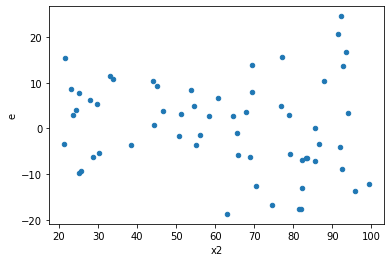

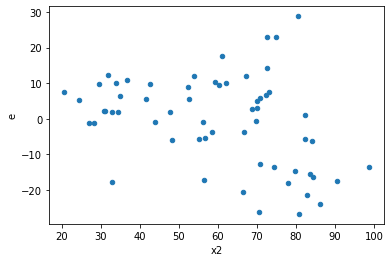

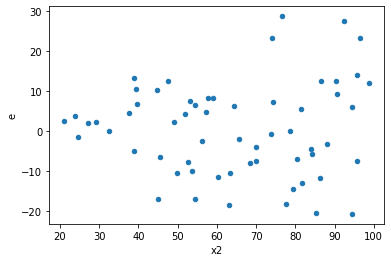

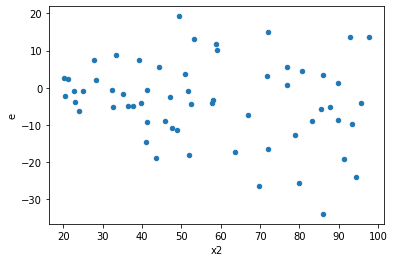

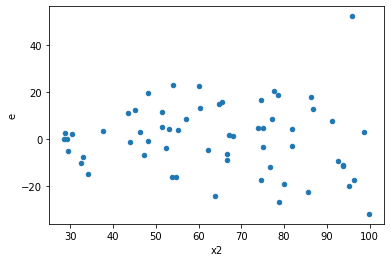

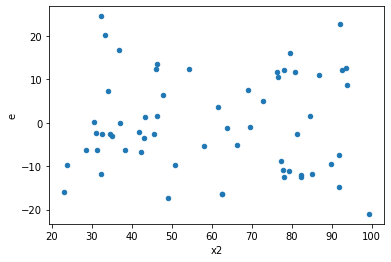

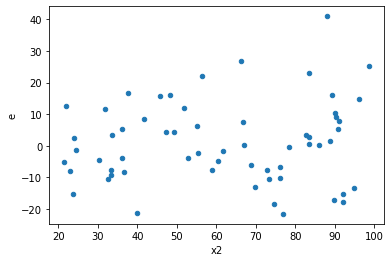

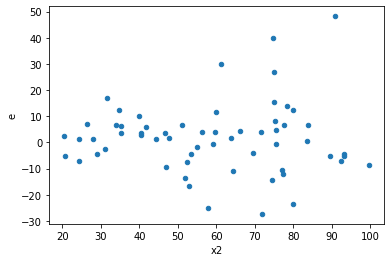

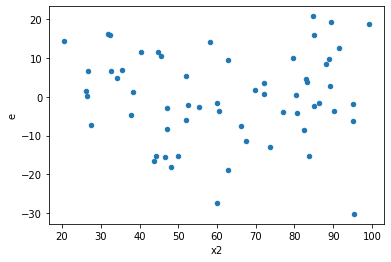

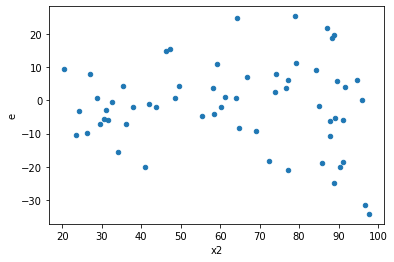

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,1092.116917703176,3538.6791500720005,52.00556750967504,168.50853095580956,3.2402017519462794,0.009555574662467814,0.9952222126687661,0.004777787331233907,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,717.4731938202264,4948.661239021207,34.16539018191554,235.65053519148603,6.89734652338965,4.258154894509758e-05,0.9999787092255275,2.129077447254879e-05,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,1139.1618892904353,2531.128656781069,54.24580425192549,120.52993603719376,2.2219218186430605,0.07429986744775574,0.9628500662761221,0.03714993372387787,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,1677.6554834175074,3834.4746496162725,79.88835635321463,182.59403093410822,2.2856150666912654,0.06484904053486606,0.967575479732567,0.03242452026743303,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,960.815742503823,4899.621930811123,45.753130595420146,233.31533003862492,5.099439688657712,0.0004437155359864331,0.9997781422320068,0.00022185776799321655,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,643.7846878919006,5519.165464801368,30.656413709138125,262.81740308577946,8.572998967828983,6.9866431173792876e-06,0.9999965066784413,3.4933215586896438e-06,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,1692.8372747754124,3899.370184013708,80.61129879882917,185.68429447684323,2.303452459440341,0.062434878926192816,0.9687825605369036,0.031217439463096408,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,1193.7412086346094,4259.310856400052,56.84481945879092,202.82432649524057,3.568035371143645,0.005238020385649023,0.9973809898071755,0.0026190101928245113,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,1718.0175247615236,3982.585364291026,81.81035832197732,189.64692210909647,2.318128486404028,0.060519434259091565,0.9697402828704542,0.030259717129545782,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,1092.116917703176,3538.6791500720005,52.00556750967504,168.50853095580956,3.2402017519462794,0.009555574662467814,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,717.4731938202264,4948.661239021207,34.16539018191554,235.65053519148603,6.89734652338965,4.258154894509758e-05,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,1139.1618892904353,2531.128656781069,54.24580425192549,120.52993603719376,2.2219218186430605,0.07429986744775574,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,1677.6554834175074,3834.4746496162725,79.88835635321463,182.59403093410822,2.2856150666912654,0.06484904053486606,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,960.815742503823,4899.621930811123,45.753130595420146,233.31533003862492,5.099439688657712,0.0004437155359864331,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,643.7846878919006,5519.165464801368,30.656413709138125,262.81740308577946,8.572998967828983,6.9866431173792876e-06,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,1692.8372747754124,3899.370184013708,80.61129879882917,185.68429447684323,2.303452459440341,0.062434878926192816,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,1193.7412086346094,4259.310856400052,56.84481945879092,202.82432649524057,3.568035371143645,0.005238020385649023,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,1718.0175247615236,3982.585364291026,81.81035832197732,189.64692210909647,2.318128486404028,0.060519434259091565,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    595
Reject005=1 : Homoscedasticity      405
Name: Result_test, dtype: int64